In [1]:
import numpy as np
import pandas as pd 

from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read CSV Data

In [2]:
df = pd.read_csv('./BOT_OUTPUT_DATA/Pune.csv')

In [3]:
df.head()

,ds,y
0,2016-1-1,444
1,2016-1-2,444
2,2016-1-3,444
3,2016-1-4,444
4,2016-1-5,444


#### Drop NULL values

In [4]:
df.dropna()
df.count()

ds    2555
y     2555
dtype: int64

#### Make Predictor

In [5]:
m = Prophet(daily_seasonality=True)

In [6]:
m.fit(df)

/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.0122
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5632.17    0.00505705       132.897      0.7217      0.7217      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5638.01   0.000500203       100.596      0.4904      0.4904      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5640.13   0.000155208       289.214   5.544e-07       0.001      344  LS failed, Hessian reset 
     299       5640.98   2.57398e-05       39.9678        0.13           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5641.71   0.000212025       210.124   2.084e-06       0.001      570  LS failed, Hessian reset 
     399       5641.83   0.000357495       343.036      0.9914      0.9914      575   
    Iter      log pro

In [7]:
forecast = m.make_future_dataframe(periods=365)
forecast = m.predict(forecast)

forecast.tail(10)

/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/suyashlawand/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2910,2023-12-22,514.666344,490.309767,591.549574,501.914622,527.683254,27.985872,27.985872,27.985872,-27.804379,...,-0.374236,-0.374236,-0.374236,56.164487,56.164487,56.164487,0.0,0.0,0.0,542.652216
2911,2023-12-23,514.670536,489.159415,596.101595,501.848437,527.762643,27.863292,27.863292,27.863292,-27.804379,...,-0.655482,-0.655482,-0.655482,56.323153,56.323153,56.323153,0.0,0.0,0.0,542.533829
2912,2023-12-24,514.674728,494.747801,595.087825,501.806142,527.840257,27.980300,27.980300,27.980300,-27.804379,...,-0.545468,-0.545468,-0.545468,56.330147,56.330147,56.330147,0.0,0.0,0.0,542.655028
2913,2023-12-25,514.678921,491.886901,595.323512,501.763846,527.917231,28.075958,28.075958,28.075958,-27.804379,...,-0.302330,-0.302330,-0.302330,56.182667,56.182667,56.182667,0.0,0.0,0.0,542.754879
2914,2023-12-26,514.683113,490.306544,596.428376,501.721551,527.994206,28.534363,28.534363,28.534363,-27.804379,...,0.458675,0.458675,0.458675,55.880066,55.880066,55.880066,0.0,0.0,0.0,543.217476
2915,2023-12-27,514.687305,491.694316,594.382508,501.679256,528.068186,28.433309,28.433309,28.433309,-27.804379,...,0.814058,0.814058,0.814058,55.423630,55.423630,55.423630,0.0,0.0,0.0,543.120614
2916,2023-12-28,514.691497,491.078935,590.565443,501.612925,528.127842,27.616721,27.616721,27.616721,-27.804379,...,0.604783,0.604783,0.604783,54.816318,54.816318,54.816318,0.0,0.0,0.0,542.308218
2917,2023-12-29,514.695689,486.103118,591.501167,501.535993,528.223049,25.883877,25.883877,25.883877,-27.804379,...,-0.374236,-0.374236,-0.374236,54.062492,54.062492,54.062492,0.0,0.0,0.0,540.579566
2918,2023-12-30,514.699881,487.814334,588.020570,501.470168,528.302102,24.707772,24.707772,24.707772,-27.804379,...,-0.655482,-0.655482,-0.655482,53.167633,53.167633,53.167633,0.0,0.0,0.0,539.407653
2919,2023-12-31,514.704074,487.796334,590.711799,501.518614,528.411024,23.788212,23.788212,23.788212,-27.804379,...,-0.545468,-0.545468,-0.545468,52.138059,52.138059,52.138059,0.0,0.0,0.0,538.492285


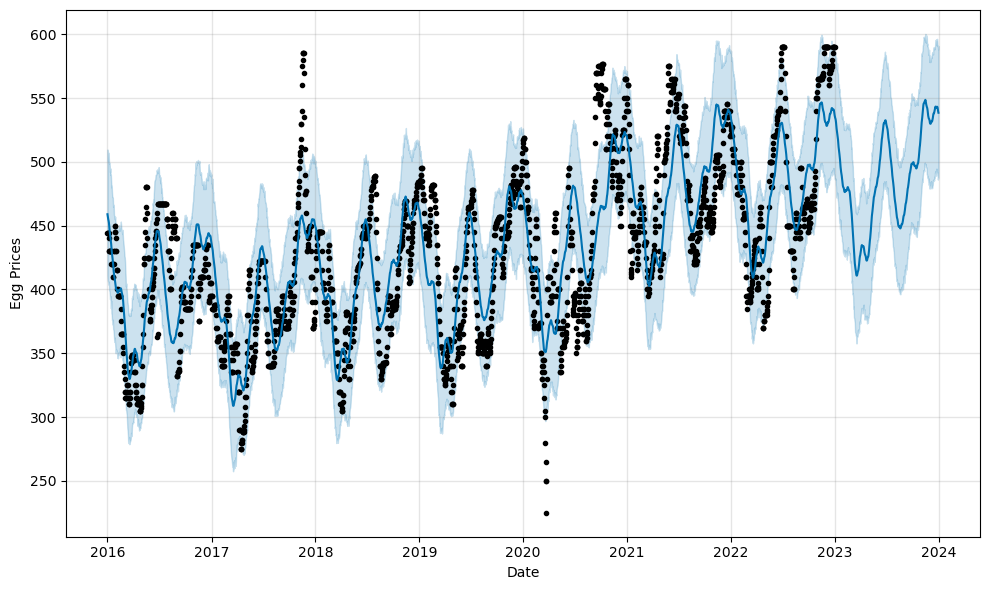

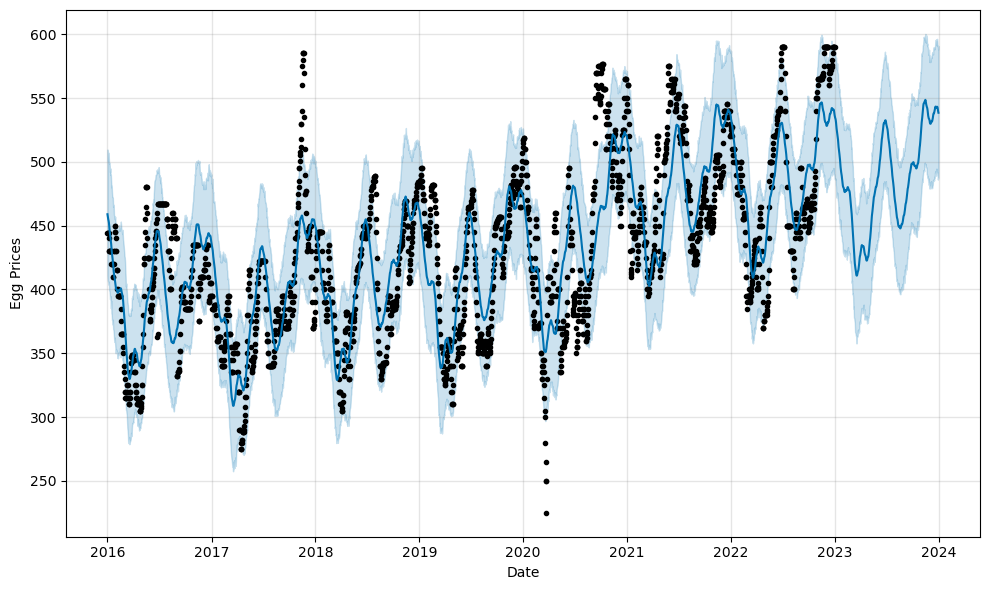

In [8]:
m.plot(forecast, ylabel='Egg Prices', xlabel='Date')